# Cross Entropy

# 1. Datasets

## 1.1 Dataset for Regression

- y^ = w1 * x1 + w2 * x2 + w3 * x3 + w4 * x4 + w5 * x5 + bias
- y = 1 * x1 + 2 * x2 + 3 * x3 + 4 * x4 + 5 * x5 + 10

In [2]:
import tensorflow as tf

N, n_feature = 8, 5

# ★ X dataset은 항상 'floating point 32bit'로 만들어 줘야 함
t_weights = tf.constant([1,2,3,4,5], dtype=tf.float32)  # target weight : vector
t_bias = tf.constant([10], dtype=tf.float32)            # target bias : scalar

print(t_weights)
print(t_bias)

tf.Tensor([1. 2. 3. 4. 5.], shape=(5,), dtype=float32)
tf.Tensor([10.], shape=(1,), dtype=float32)


In [5]:
X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))

print(X.shape, t_weights.shape, t_bias.shape)

(8, 5) (5,) (1,)


In [11]:
y = tf.reduce_sum(t_weights * X, axis=1) + t_bias

print('X(shape/dtype/data) : {} / {}\n{}\n'.format(X.shape, X.dtype, X.numpy()))
print('y(shape/dtype/data) : {} / {}\n{}\n'.format(y.shape, y.dtype, y.numpy()))

X(shape/dtype/data) : (8, 5) / <dtype: 'float32'>
[[ 1.7929381   0.05446349  1.5258646   0.9085449  -0.8308491 ]
 [-1.8426176   0.8417825  -1.1884025  -0.40641326 -0.5700096 ]
 [ 0.57068413 -0.15591258 -0.9097071   1.4430418  -1.2185172 ]
 [ 1.3586092  -0.16413265 -1.709701    0.38408363  0.59364885]
 [-0.39531717 -1.1281215   0.36780736 -1.906524    0.74065053]
 [-0.39406484 -0.4897225  -0.30566016 -0.07331786  0.75019807]
 [-0.887472    1.3133476   0.20211841 -0.3703274  -0.39634082]
 [ 0.78238934 -1.4857779  -0.93681604  3.7526588  -0.43597466]]

y(shape/dtype/data) : (8,) / <dtype: 'float32'>
[15.9593935  1.8000393  7.2093186 10.40582    4.5290194 11.167229
  8.882565  17.831146 ]



## 1.2 Dataset for Binary Classification

In [16]:
import tensorflow as tf

N, n_feature = 8, 5

t_weights = tf.constant([1,2,3,4,5], dtype=tf.float32)  # target weight : vector
t_bias = tf.constant([10], dtype=tf.float32)            # target bias : scalar

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))
y = tf.reduce_sum(t_weights * X, axis=1) + t_bias

data type 변경 : cast

In [17]:
print(y)

y = y > 5
print(y)   # bool

y = tf.cast(y, tf.int32)  # int32
print(y)

tf.Tensor(
[-4.920969   9.563859  -1.0712347  3.136613   5.7535005  8.229988
 21.249746   7.722287 ], shape=(8,), dtype=float32)
tf.Tensor([False  True False False  True  True  True  True], shape=(8,), dtype=bool)
tf.Tensor([0 1 0 0 1 1 1 1], shape=(8,), dtype=int32)


-[y * log(y^) + (1-y) * log(1-y^)] 식에 y값이 대입됨

In [18]:
print('X(shape/dtype/data) : {} / {}\n{}\n'.format(X.shape, X.dtype, X.numpy()))
print('y(shape/dtype/data) : {} / {}\n{}\n'.format(y.shape, y.dtype, y.numpy()))

X(shape/dtype/data) : (8, 5) / <dtype: 'float32'>
[[-0.35293844  0.45599595 -1.4105307  -1.2806876  -1.2251359 ]
 [ 1.1139133  -0.23092116 -1.3665164   0.18392622  0.45512652]
 [-0.65587825 -1.6355362  -0.45406935 -0.47311378 -0.7779241 ]
 [-1.0433375  -0.01988743 -0.49298996 -0.3329583  -0.59389424]
 [-0.39064562  0.8288548  -0.71753484 -0.31097692 -0.42341027]
 [-0.44930536  0.614705   -0.2558359  -1.6977513   1.0016792 ]
 [ 0.45793647 -0.78212684  0.22440511  2.4397538   0.38476652]
 [-0.54270476 -0.08615544 -1.6182011   0.80706316  0.01273068]]

y(shape/dtype/data) : (8,) / <dtype: 'int32'>
[0 1 0 0 1 1 1 1]



## 1.3 Dataset for Multi-class Classification

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn')

(30, 2) (30, 1)
(60, 2) (60, 1)
(90, 2) (90, 1)
(120, 2) (120, 1)
(150, 2) (150, 1)


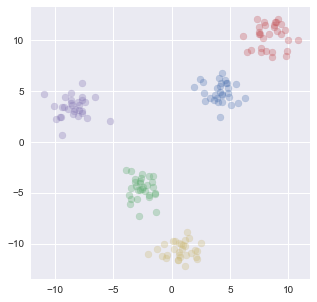

In [34]:
N, n_feature = 30, 2
n_class = 5

X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0,1), dtype = tf.int32)

fig, ax = plt.subplots(figsize=(5,5))
for class_idx in range(n_class):
    center = tf.random.uniform(minval=-15, maxval=15, shape=(2, ))
    
    # center point
    # ax.scatter(center[0], center[1])
    
    # 전체 dataset = 5 * 30 = 150
    x1 = center[0] + tf.random.normal(shape=(N, 1))  # 한 class 당 30개 생성 : column vector
    x2 = center[1] + tf.random.normal(shape=(N, 1))
    
    # x1 : 가로축 / x2 : 세로축
    # ax.scatter(x1.numpy(), x2.numpy())
    
    x = tf.concat((x1, x2), axis=1)
    y = class_idx * tf.ones(shape=(N, 1), dtype=tf.int32)
    
    ax.scatter(x[:, 0].numpy(), x[:, 1].numpy(), alpha=0.3)
    
    X = tf.concat((X, x), axis=0)
    Y = tf.concat((Y, y), axis=0)
    
    print(X.shape, Y.shape)

In [41]:
N, n_feature = 3, 2
n_class = 5

X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0,1), dtype = tf.int32)

for class_idx in range(n_class):
    center = tf.random.uniform(minval=-15, maxval=15, shape=(2, ))
    
    # 전체 dataset = 5 * 3 = 15행
    x1 = center[0] + tf.random.normal(shape=(N, 1))  # 한 class 당 3개 생성 : column vector
    x2 = center[1] + tf.random.normal(shape=(N, 1))
    
    x = tf.concat((x1, x2), axis=1)
    y = class_idx * tf.ones(shape=(N, 1), dtype=tf.int32)
        
    X = tf.concat((X, x), axis=0)
    Y = tf.concat((Y, y), axis=0)
    
print('X(shape/dtype/data) : {} / {}\n{}\n'.format(X.shape, X.dtype, X.numpy()))
print('Y(shape/dtype/data) : {} / {}\n{}\n'.format(Y.shape, Y.dtype, Y.numpy()))

X(shape/dtype/data) : (15, 2) / <dtype: 'float32'>
[[  9.391296    -4.086206  ]
 [  9.977894    -2.7523756 ]
 [  7.9057508   -2.607749  ]
 [  5.732707     6.0332303 ]
 [  5.1997538    6.977717  ]
 [  4.5586452    9.710466  ]
 [  2.7791028    1.2995172 ]
 [  2.5188947    0.27784026]
 [  3.0248656    0.5430124 ]
 [-11.265545    10.509066  ]
 [ -8.835118     8.249667  ]
 [ -9.91539     10.785931  ]
 [ -2.0914679    6.070078  ]
 [ -3.2940376    4.8253427 ]
 [ -1.7535553    5.060332  ]]

Y(shape/dtype/data) : (15, 1) / <dtype: 'int32'>
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [4]
 [4]
 [4]]



## 1.4 Dataset for Multi-class Classification with One-hot Encoding

In [47]:
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn')

X(shape/dtype/data) : (40, 2) / <dtype: 'float32'>
[[ -4.992335    -2.1709793 ]
 [  4.3430047    0.4114894 ]
 [ 12.758419    -0.13387114]
 [  0.26733607   1.7834531 ]
 [  8.139075    -0.17020436]
 [ 21.502893    -0.27283025]
 [  4.740779    -1.4372742 ]
 [ -6.217711     1.8213649 ]
 [ -0.4308342    5.0367556 ]
 [ -1.6375632   -8.791103  ]
 [  0.6302783    5.860409  ]
 [ -0.67087215  -3.3397791 ]
 [ -4.0887656    5.433814  ]
 [ -3.7331707   -1.6333985 ]
 [ -7.377694   -12.411938  ]
 [  1.8550476    4.0432324 ]
 [ -9.8306675   -4.884628  ]
 [  5.336958     2.2078254 ]
 [  0.2162349   -2.937552  ]
 [  1.7511662    3.5909817 ]
 [  4.0881824   -5.2410426 ]
 [  2.126004     4.624718  ]
 [  1.9860208    3.1975627 ]
 [  7.7524967   -2.2880776 ]
 [  1.3170519    0.6219006 ]
 [ -4.112838    -1.1884338 ]
 [-10.917864     1.0627887 ]
 [  2.6907358    0.52700686]
 [ -6.5283985   -0.27711546]
 [  5.4078555    0.7367557 ]
 [ 10.546708    -0.07353756]
 [  3.0510242   -0.9760554 ]
 [  2.332608     2.42

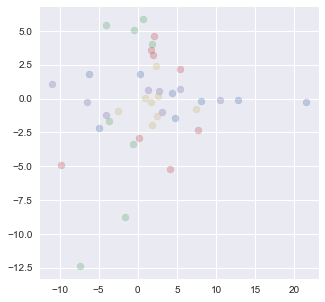

In [51]:
N, n_features = 8, 2
n_class = 5

X = tf.zeros(shape=(0, n_feature))

# one-hot encoding을 위해 matrix가 아닌 vector로 생성해야 함
# shape=(0,1) → shape(0,)
Y = tf.zeros(shape=(0, ), dtype=tf.int32)

fig, ax = plt.subplots(figsize=(5,5))
for class_idx in range(n_class):
    center = tf.random.uniform(minval=-15, maxval=15, shape=(2, ))
    
    x1 = center[0] * tf.random.normal(shape=(N,1))
    x2 = center[1] * tf.random.normal(shape=(N,1))
    
    x = tf.concat((x1, x2), axis=1)
    # one-hot encoding을 위해 matrix가 아닌 vector로 생성해야 함
    # shape=(N,1) → shape(N,)
    y = class_idx * tf.ones(shape=(N, ), dtype=tf.int32)
    
    ax.scatter(x[:, 0].numpy(), x[:, 1].numpy(), alpha=0.3)
    
    X = tf.concat((X, x), axis=0)
    Y = tf.concat((Y, y), axis=0)
    
Y = tf.one_hot(Y, depth=n_class, dtype=tf.int32)

print('X(shape/dtype/data) : {} / {}\n{}\n'.format(X.shape, X.dtype, X.numpy()))
print('Y(shape/dtype/data) : {} / {}\n{}\n'.format(Y.shape, Y.dtype, Y.numpy()))

## 1.5 Dataset Objects

- ★ neural network를 만들고 training 하는 것만큼 중요한 게 input pipeline을 만드는 것
  - dataset을 어떻게 뽑아서 모델에 넣어줄지
  - input pipeline에 대한 강의도 보면 좋음

In [61]:
import tensorflow as tf

N, n_feature = 100, 5
batch_size = 32

t_weights = tf.constant([1,2,3,4,5], dtype=tf.float32)
t_bias = tf.constant([10], dtype=tf.float32)

# 가짜 데이터 만들기
X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))
Y = tf.reduce_sum(t_weights*X, axis=1) + t_bias

### 방법1
- 귀찮은 방법 (권장하지 않음)
- 단순히 가져와야 하는 것이 아닌, 순서를 섞어야 하기도 하고, cash를 만드는 등 여러가지를 고려해야 하기 때문
- 그래서 일반적으로 '방법2'를 사용

In [ ]:
# 몫
print(N//batch_size)

for batch_idx in range(N // batch_size):
    # mini-batch
    x = X[batch_idx * batch_size : (batch_idx + 1) * batch_size, ...]
    y = Y[batch_idx * batch_size : (batch_idx + 1) * batch_size, ...]
    
    print(x.shape, y.shape)

### 방법2

- 제일 많이 사용하는 방법
- tf.data.Dataset. : dataset을 만들어주는 API (function)
- tensorflow에서 dataset을 만드는 방법이 많은데, 이 방법이 가장 간단
  - 직접 dataset을 만들고 (X, Y), 이를 통해 dataset object 만들기
- from_tensor_slices : tensor를 만들 때 사용
  - MNIST 정도의 작은 데이터는 괜찮음
  - 지금 (X, Y)처럼 우리가 만든 data도 매우 작은 크기
  -  100GB가 넘는 데이터는 computer vision에서 사용하는 더 복잡한 dataset 만드는 거로 사용해야 함

In [60]:
dataset = tf.data.Dataset.from_tensor_slices((X, Y))
print(dataset)  # tensor가 아닌 어떤 object가 만들어짐

# batch_size(32) 단위로 나눠서 데이터 가져옴
dataset = dataset.batch(batch_size)
# dataset = dataset.batch(batch_size).shuffle(100)

# object 하나씩 뽑아오기
for x, y in dataset:
    print(x.shape, y.shape)

<TensorSliceDataset element_spec=(TensorSpec(shape=(5,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>
(32, 5) (32,)
(32, 5) (32,)
(32, 5) (32,)
(4, 5) (4,)


# 2. Mean Squared Error

## 2.1 MSE Calculation

In [5]:
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError

# y^ - y
loss_object = MeanSquaredError()

batch_size = 32
predictions = tf.random.normal(shape=(batch_size, 1))  # column vector
labels = tf.random.normal(shape=(batch_size, 1))

mse = loss_object(labels, predictions)

# tf.math.pow(A,2) : A를 제곱 해라 (power)
# tf.reduce_mean : 평균값
mse_manual = tf.reduce_mean(tf.math.pow(labels-predictions, 2))

print(predictions.shape, labels.shape)
print('MSE(Tensorflow): ', mse.numpy())
print('MSE(Manual): ', mse_manual.numpy())

(32, 1) (32, 1)
MSE(Tensorflow):  2.0863976
MSE(Manual):  2.0863976


## 2.2 MSE with Model/Dataset

In [7]:
import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError

N, n_feature = 100, 5
batch_size = 32

X = tf.random.normal(shape=(N, n_feature))
Y = tf.random.normal(shape=(N, 1))

dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size)

model = Dense(units=1, activation='linear')
loss_object = MeanSquaredError()

# Mini-batch
for x, y in dataset:
    #print(x.shape, y.shape)
    predictions = model(x)
    loss = loss_object(y, predictions)
    print(loss.numpy())

1.5794153
2.5506928
3.305806
4.022665


# 3. Binary Cross Entropy

## 3.1 BCE Calculation

In [11]:
import tensorflow as tf

from tensorflow.keras.losses import BinaryCrossentropy

batch_size = 32
n_class = 2

predictions = tf.random.uniform(shape=(batch_size, 1),
                                minval=0, maxval=1,
                                dtype=tf.float32)

# labels : 0 아니면 1이어야 함
labels = tf.random.uniform(shape=(batch_size, 1),
                           minval=0, maxval=n_class,
                           dtype=tf.int32)

#print(predictions)  # 예측값 y^
#print(labels)       # 실제값

loss_object = BinaryCrossentropy()
loss = loss_object(labels, predictions)

# print(labels * predictions)  # Error : datatype이 다르기 때문
labels = tf.cast(labels, tf.float32)    # labels type 변경
bce_man = -(labels * tf.math.log(predictions) + (1 - labels) * tf.math.log(1-predictions))
bce_man = tf.reduce_mean(bce_man)

print('BCE(tensorflow): ', loss.numpy())
print('BCE(Manual): ', bce_man.numpy())

BCE(tensorflow):  0.8879665
BCE(Manual):  0.887967


## 3.2 BCE with Model/Dataset

In [12]:
import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

N, n_feature = 100, 5
t_weights = tf.constant([1,2,3,4,5], dtype=tf.float32)
t_bias = tf.constant([10], dtype=tf.float32)

batch_size = 32

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))
Y = tf.reduce_sum(t_weights * X, axis=1) + t_bias
Y = tf.cast(Y > 5, tf.int32)    # 1, 0 표시

dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size)

model = Dense(units=1, activation='sigmoid')
loss_object = BinaryCrossentropy()

for x, y in dataset:
    predictions = model(x)
    loss = loss_object(y, predictions)
    print(loss.numpy())

0.6312551
0.6324998
0.6726794
0.8472558


# 4. Sparse Categorical Cross Entropy

## 4.1 SCCE Calculation

In [23]:
import tensorflow as tf

from tensorflow.keras.losses import SparseCategoricalCrossentropy

batch_size, n_class = 16, 5

predictions = tf.random.uniform(shape=(batch_size, n_class),
                                minval=0, maxval=1,
                                dtype=tf.float32)

pred_sum = tf.reshape(tf.reduce_sum(predictions, axis=1), (-1, 1))  # column vector로 reshape
predictions = predictions/pred_sum

labels = tf.random.uniform(shape=(batch_size, ),
                           minval=0, maxval=n_class,
                           dtype=tf.int32)

print(predictions.shape, pred_sum.shape)
print(labels)

(16, 5) (16, 1)
tf.Tensor([4 0 2 0 4 0 4 0 0 1 0 4 1 1 3 1], shape=(16,), dtype=int32)


In [24]:
loss_object = SparseCategoricalCrossentropy()
loss = loss_object(labels, predictions)

print(loss.numpy())

1.9604216


In [25]:
ce = 0

for label, prediction in zip(labels, predictions):
    # print(label.shape, prediction.shape)   # label : scalar / prediction : vector
    # print(label, prediction)
    ce += -tf.math.log(prediction[label])

# 평균
ce /= batch_size
print(ce.numpy())

1.9604216


## 4.2 SCCE with Model/Dataset

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [35]:
N, n_feature = 100, 2
n_class = 5

batch_size = 16

X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0, 1), dtype=tf.int32)

#fig, ax = plt.subplots(figsize=(5,5))
for class_idx in range(n_class):
    center = tf.random.uniform(minval=-15, maxval=15, shape=(2,))
    
    x1 = center[0] + tf.random.normal(shape=(N,1))
    x2 = center[1] + tf.random.normal(shape=(N,1))
    
    x = tf.concat((x1, x2), axis=1)
    y = class_idx * tf.ones(shape=(N, 1), dtype=tf.int32)
    
    #ax.scatter(x[:, 0].numpy(), x[:, 1].numpy(), alpha=0.3)
    
    X = tf.concat((X, x), axis=0)
    Y = tf.concat((Y, y), axis=0)

dataset = tf.data.Dataset.from_tensor_slices((X,Y))
dataset = dataset.batch(batch_size)

model = Dense(units=n_class, activation='softmax')
loss_object = SparseCategoricalCrossentropy()

for x, y in dataset:
    predictions = model(x)
    # print(predictions.shape, y.shape)  # -> (16, 5) (16, 1)
    loss = loss_object(y, predictions)
    print(loss.numpy())

9.265693
9.513208
9.49926
9.111867
9.131399
9.810555
6.265301
5.1344833
4.9197245
5.320586
5.315525
5.2780366
9.453121
13.07366
12.946371
12.949421
13.308176
12.609579
10.428583
3.5824587
3.2305875
3.2918036
3.3068366
3.4270396
3.7352822
16.345768
16.402035
16.648355
16.742983
16.162436
16.691952
15.733899


# 5. Categorical Cross Entropy

## 5.1 CCE Calculation

In [44]:
import tensorflow as tf

from tensorflow.keras.losses import CategoricalCrossentropy

batch_size, n_class = 16, 5

predictions = tf.random.uniform(shape=(batch_size, n_class),
                                minval=0, maxval=1,
                                dtype=tf.float32)

pred_sum = tf.reshape(tf.reduce_sum(predictions, axis=1), (-1, 1))  # column vector로 reshape
predictions = predictions/pred_sum

labels = tf.random.uniform(shape=(batch_size, ),
                           minval=0, maxval=n_class,
                           dtype=tf.int32)

labels = tf.one_hot(labels, n_class)
print(labels)

tf.Tensor(
[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]], shape=(16, 5), dtype=float32)


In [45]:
# CategoricalCrossentropy() : y label이 one hot encoding이 되어있어야 함
loss_object = CategoricalCrossentropy()
loss = loss_object(labels, predictions)
print('CCE(Tensorflow): ', loss.numpy())

CCE(Tensorflow):  1.8930733


In [46]:
cce_man = tf.reduce_mean(tf.reduce_sum(-labels * tf.math.log(predictions), axis=1))
print('CCE(Manual): ', cce_man.numpy())

CCE(Manual):  1.8930733


## 5.2 CCE with Model/Dataset

- 데이터 안에 one hot vector들이 들어있을 때 loss를 구하는 방법

In [50]:
import tensorflow as tf
from tensorflow.keras.losses import CategoricalCrossentropy

N, n_feature = 8, 2
n_class = 5

X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0, ), dtype=tf.int32)

for class_idx in range(n_class):
    center = tf.random.uniform(minval=-15, maxval=15, shape=(2,))
    
    x1 = center[0] * tf.random.normal(shape=(N,1))
    x2 = center[1] * tf.random.normal(shape=(N,1))
    
    x = tf.concat((x1, x2), axis=1)
    y = class_idx * tf.ones(shape=(N, ), dtype=tf.int32)
    
    X = tf.concat((X, x), axis=0)
    Y = tf.concat((Y, y), axis=0)

Y = tf.one_hot(Y, depth=n_class, dtype=tf.int32)

dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size)

model = Dense(units=n_class, activation='softmax')
loss_object = CategoricalCrossentropy()

for x, y in dataset:
    predictions = model(x)
    #print(predictions.shape, y.shape)
    loss = loss_object(y, predictions)
    print(loss.numpy())

3.864978
5.336947
7.6925426
